In [1]:
#!pip install scanpy==1.9.3

In [2]:
import os
import numpy as np
import scipy.sparse
import scipy.io
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy import stats 
from scipy import * 
import numpy as np
import scanpy as sc
import pandas as pd

In [3]:

dataset = 'Healthy_Heart' # Lung, Immune_Human, Human_Retina, Pancreas

dir_path = "/home/ajita/Documents/data_integration/Healthy_Heart/"
emb_folder = "/home/ajita/Documents/data_integration/Healthy_Heart/UnSup_keras_0.0002/"


In [4]:

batch_key_dic = {'Immune_Human' : 'batch',
                  "Healthy_Heart" : "sampleID",
                 'Lung' : 'batch',
                 'Pancreas' : 'tech',
                 'Human_Mouse' : 'batch',
                 'Human_Retina': "Batch"
                 
                }
cell_type_key_dic = {'Immune_Human' : 'final_annotation',
                      "Healthy_Heart" : "celltype",
                 'Lung' : 'cell_type',
                 'Pancreas' : 'celltype',
                 'Human_Mouse' : "celltype",
                 "Human_Retina":"Subcluster"
                    } 



In [5]:

embeddings = 'latent_matrix_ccc300.csv'

batch = batch_key_dic[dataset]
cell_type = cell_type_key_dic[dataset]

#adata = load_data(dataset,batch)
adata = sc.read_h5ad(dir_path + 'Healthy_human_heart_adata.h5ad')
adata_int = adata.copy()

emb_path = emb_folder + embeddings 

final_embedings = pd.read_csv(emb_path, sep = ',',header = None).values
adata_int.obsm['final_embeddings'] = final_embedings


/bin/bash: /home/ajita/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


Clustering...
use rep: final_embeddings
0.0001 1
0.0790421052631579 9
0.15798421052631578 11
0.23692631578947368 11
0.3158684210526316 14
0.3948105263157895 14
0.47375263157894737 14
0.5526947368421052 16
0.6316368421052632 17
0.7105789473684211 19
0.789521052631579 19
0.8684631578947368 19
0.9474052631578948 21
1.0263473684210527 23
1.1052894736842105 25
1.1842315789473685 26
1.2631736842105263 27
1.3421157894736842 27
1.4210578947368422 28
1.5 29


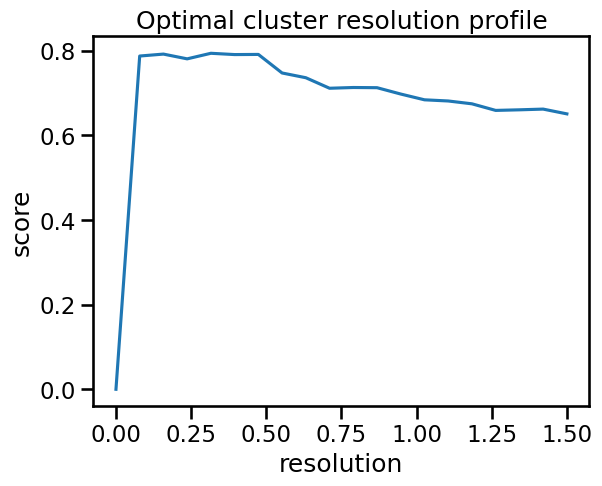

NMI...
ARI...
Silhouette score...
PC regression...
Isolated labels F1...
use rep: final_embeddings
0.0001 1
0.0790421052631579 9
0.15798421052631578 11
0.23692631578947368 11
0.3158684210526316 14
0.3948105263157895 14
0.47375263157894737 14
0.5526947368421052 16
0.6316368421052632 17
0.7105789473684211 19
0.789521052631579 19
0.8684631578947368 19
0.9474052631578948 21
1.0263473684210527 23
1.1052894736842105 25
1.1842315789473685 26
1.2631736842105263 27
1.3421157894736842 27
1.4210578947368422 28
1.5 29
Isolated labels ASW...
Graph connectivity...
kBET...
Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 4
Adding diffusion to step 4
Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
Adding diffusion to step 7
Adding diffusion to step 8
Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
Adding diffusion to step 4
Adding diffusion to step 5
Add

In [6]:
import scIB
results,ilisi_all,clisi_all,kbet_all  =   scIB.metrics.metrics(                
                adata,
                adata_int,
                batch_key = batch, #need to change according
                label_key = cell_type, #need to change according
                hvg_score_= False,
                cluster_key ='cluster',
                cluster_nmi = None,
                ari_= True,
                nmi_= True,
                nmi_method='arithmetic',
                nmi_dir=None,
                silhouette_=True, #
                embed= 'final_embeddings', #need to change according 
                si_metric='euclidean',
                pcr_=True,
                cell_cycle_=False,
                organism='mouse',
                isolated_labels_= True,  # backwards compatibility # isolated scores False for human mouse
                isolated_labels_f1_= False,
                isolated_labels_asw_= False,
                n_isolated = None,
                graph_conn_= True, #
                kBET_= True,#True,#
                kBET_sub = 0.5,
                lisi_graph_= True,#
                lisi_raw = True,#
                trajectory_= False,
                type_= None,
                verbose = False,
        )

In [7]:
results

,0
NMI_cluster/label,0.793673
ARI_cluster/label,0.751858
ASW_label,0.582979
ASW_label/batch,0.761727
PCR_batch,0.321856
cell_cycle_conservation,NaN
isolated_label_F1,0.256789
isolated_label_silhouette,0.441281
graph_conn,0.826720
kBET,0.527626


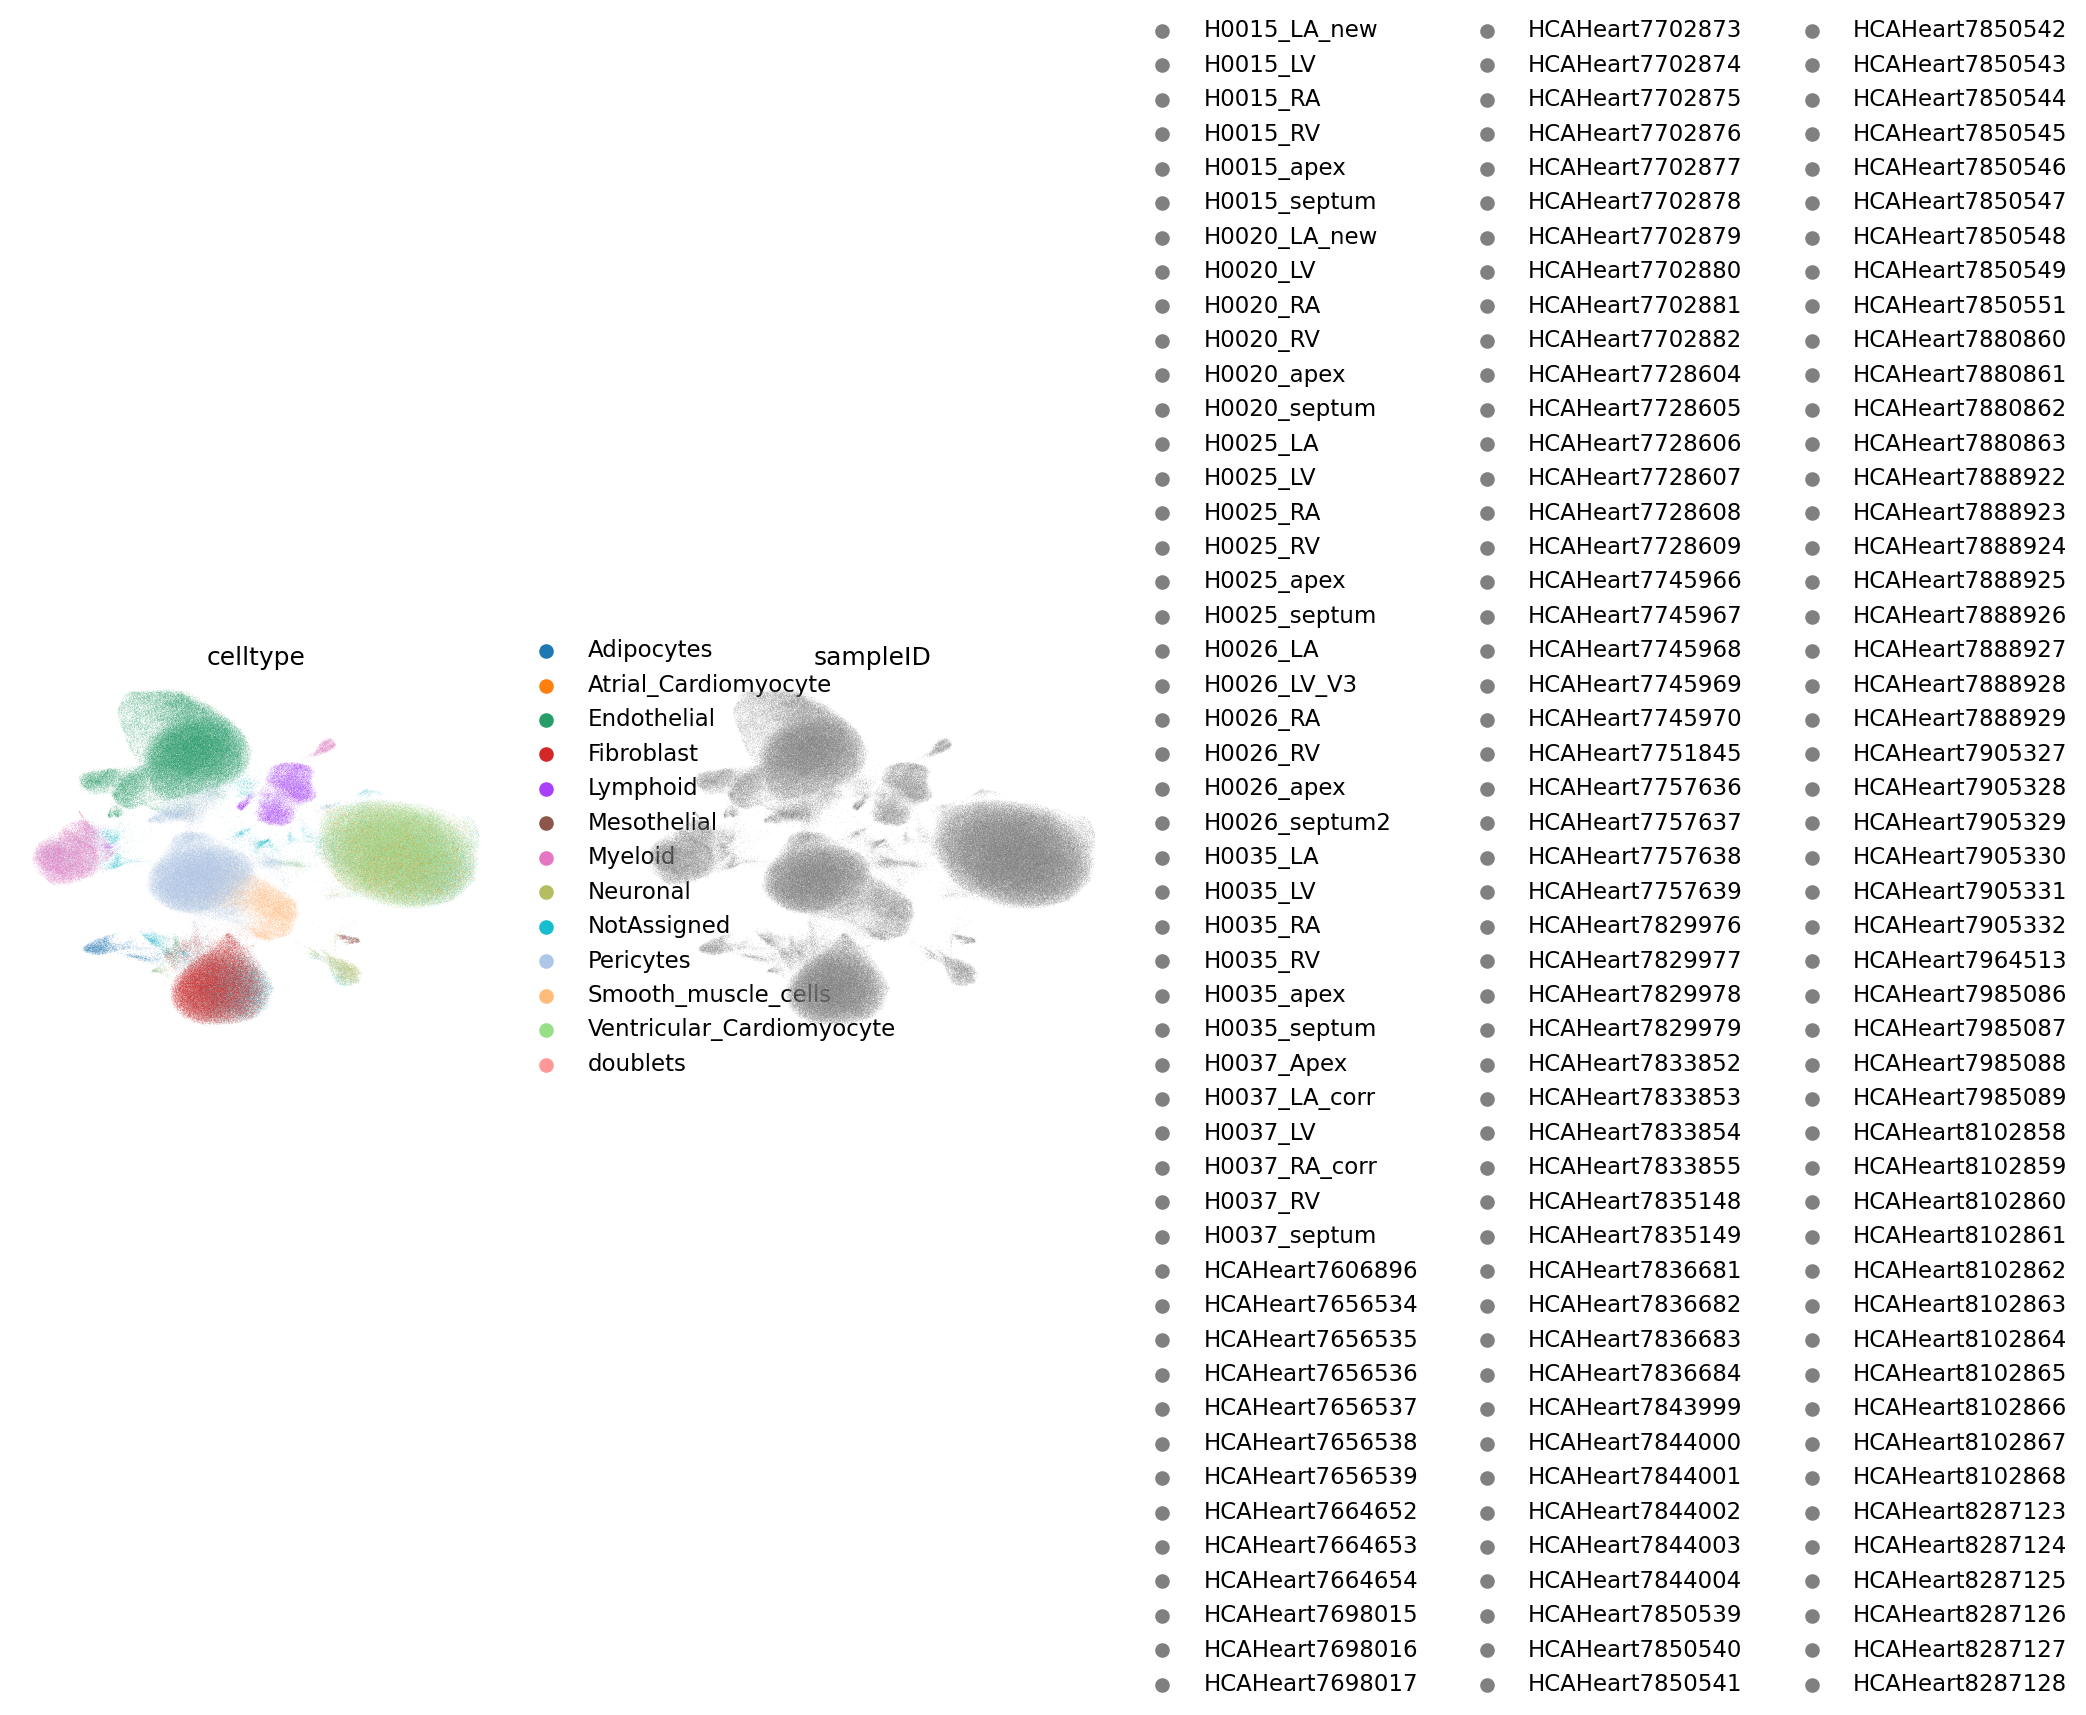

In [8]:
sc.pp.neighbors(adata_int, use_rep='final_embeddings') # use_rep = 'final_embeddings'
sc.tl.umap(adata_int)
sc.pl.umap(adata_int, color=[cell_type, batch], frameon=False)
